## content
- Approximate Fourier transform
- Fourier Difference
- algorithm of discrete Fourier transform
- fast discrete Fourier transform


### approximate Fourier transform
$dk,dx$ should satisfy $dkdx = 2\pi/n$
$$\psi_n = \frac{\Delta x}{\sqrt{2\pi}}\sum_{m=0}^{N-1}\phi_m e^{2\pi i (m-a)(n-a)/N}$$
$$\phi_m = \frac{\Delta k}{\sqrt{2\pi}}\sum_{n=0}^{N-1}\psi_n e^{-2\pi i (m-a)(n-a)/N}$$
$$a = \frac{N-1}{2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# define the properties
N = 201
a = (N - 1)/2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx) # 1D array, x.shape: (201,)

psi = np.exp(-(x**2)/2)*np.sin(4*x)

# define the k-grid
dk = 2*np.pi / (N*dx)
kmax = np.pi / dx
k = np.arange(-kmax, kmax, dk)  # 1D array, k.shape: (202,)

# the 2-dimensional Fourier matrix using broadcasting
n = np.arange(N).reshape((-1, 1))   # 2D array, change with rows, n.shape(201,1)
m = np.arange(N).reshape((1, -1))   # 2D array, change with columns, m.shape(1,201)
W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)  # numpy array broarcasting, W is a 2D array, W.shape(201,201)

# perform the discretised Fourier algorithm
# psi is indexed by n
psi_dft = psi.reshape(-1, 1)      # 2D array, psi_dft.shape(201,1)
# sum over n axis
phi = np.sum(psi_dft * W, axis=0)*dk/np.sqrt(2*np.pi) # 1D array, phi.shape(201,)
i = 0.0+1.0j
phi = np.abs(phi)

(-10.0, 10.0)

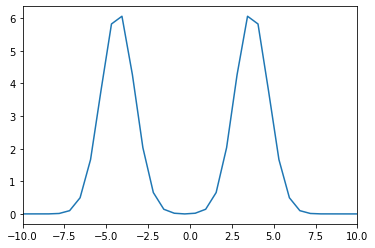

In [25]:
plt.plot(k[:-1],phi)
plt.xlim(-10,10)

## Fourier differentiation
$$\psi(x,t) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\phi(k,t)e^{ikx}dk$$
$$\begin{aligned}\frac{\partial}{\partial x}\psi(x,t)& = \frac{1}{\sqrt{2\pi}}\int_{\infty}^{\infty}\phi(k,t)\frac{\partial}{\partial x}e^{ikx}dk \\
&= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\phi(k,t)ike^{ikx}dk\\
&= \frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\psi(x',t)ike^{ik(x-x')}dxdk\end{aligned}$$

$$\begin{aligned}
\psi_l'&=\frac{1}{2\pi}\Delta x\Delta k\sum_{n=0}^{N-1}\sum_{m=0}^{N-1}\psi_nik_me^{ik_m(x_l-x_n)}
\\&=\frac{2\pi i}{N^2\Delta x}\sum_{n=0}^{N-1}\sum_{m=0}^{N-1}(m-a)\psi_ne^{2\pi i(m-a)(l-n)/N}
\end{aligned}
$$

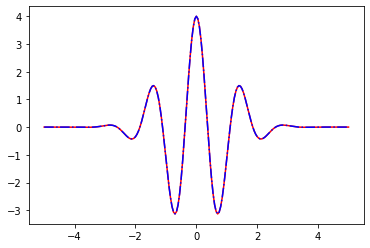

In [26]:
N = 201
a = (N - 1 ) / 2
halfL = 5
dx = (halfL - (-halfL)) / (N - 1)

# define the x-grid and discretised wavefunction
x = np.arange(-halfL, halfL+dx, dx)
psi = np.exp(-(x**2)/2) * np.sin(4*x)

# create the 3-dimensional Fourier diff matrix
l = np.arange(N).reshape((-1,1,1))
n = np.arange(N).reshape((1,-1,1))
m = np.arange(N).reshape((1,1,-1))
W = np.exp(2j*np.pi*(m-a)*(l-n)/N)

# perform the Fourier differentiation
psi_for_fft_diff = psi.reshape(1,-1,1)
dpsi = np.sum((2j*np.pi)/(dx*N**2) * psi_for_fft_diff * (m-a) * W, axis=(1,2))

dpsi_exact = -x * psi + 4*np.exp(-(x**2)/2)*np.cos(4*x)
fig,ax = plt.subplots()
ax.plot(x,dpsi_exact,'r', x,np.real(dpsi),'-.b')

## Discrete Fourier Transform
a **discrete**, **periodic** function $f_n$, resulting in a **discrete**, **periodic** transform $F_m$

$$
F_m = \sum_{n=0}^{N-1}f_ne^{-2\pi imn/N}
$$$$f_n = \frac{1}{N}\sum_{m=0}^{N-1}F_me^{2\pi imn/N}$$

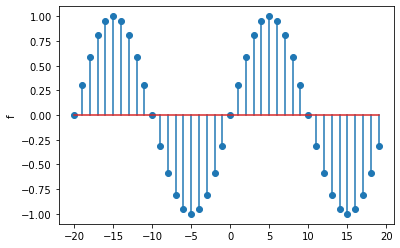

<function matplotlib.pyplot.show(*args, **kw)>

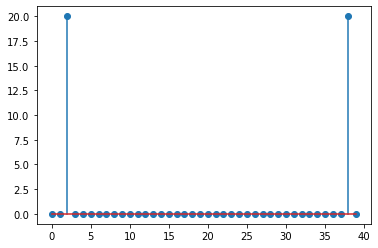

In [104]:
import warnings
warnings.filterwarnings('ignore')
# define the x grid
N = 40
halfL = 20
dx = (halfL - (-halfL))/N
xgrid = np.arange(-halfL, halfL, dx)  #the last point should not be included in commit by zx

# define the discretised unit triangle function
f = np.sin(4*xgrid*np.pi/40)
plt.stem(xgrid,f)
plt.ylabel('f')
plt.show()
# create the matrix W using broadcasting
m = np.arange(N)[:, None] # this is the first index
n = np.arange(N)[None, :] # this is the second index
W = np.exp(-2j*np.pi*m*n/N)

# Perform the DFT
F = np.dot(W,f)
plt.stem(m,np.abs(F))
plt.show

## Phase-shifts
use DFT to calculate approximating Fourier transform
$$\begin{aligned}\phi_m &= \sum_{n=0}^{N-1}\psi_ne^{-2\pi i(m-a)(n-a)/N}\\
&=e^{2\pi i(m-a)a/N}\sum_{n=0}^{N-1}\left[\psi_ne^{2\pi ian/N}\right]e^{-2\pi imn/N}\\
&= e^{2\pi i(m-a)a/N}\text{DFT}(\phi_ne^{2\pi i an/N})
\end{aligned}$$

## The Fast Fourier Transform


In [74]:
# define the FFT function
def FFT2(f):
    N = len(f)
    if N == 1: # DFT is length 1
        F = f
    elif N % 2 != 0: # DFT is not divisible by 2, perform
        # standard DFT algorithm
        m = np.arange(N)[:, None]
        n = np.arange(N)[None, :]
        F = np.dot(np.exp(-2j*np.pi*m*n/N), f)
    else:
        # divide the DFT into two using radix-2 Cooley-Tukey
        Am = FFT2(f[::2])
        Bm = FFT2(f[1::2])
        # combine using twiddle factors
        m = np.arange(N/2)
        W = np.exp(-2j*np.pi*m/N)
        F = np.concatenate([Am + W*Bm, Am - W*Bm])
    return F

In [77]:
from scipy import fftpack
fftpack.fft()
fftpack.ifft() #inverse FFT
fftpack.rfft() #FFT of real

TypeError: fft() missing 1 required positional argument: 'x'